# Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


## Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
4.530449433000001
GPU (s):
0.2116293259999793
GPU speedup over CPU: 21x


In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls "/content/gdrive/My Drive/Colab Notebooks/ocr_images"

'crop_1 (1).jpg'       CTPN_paper.pdf	     input_image_2_crops
 crop_1_enhanced.jpg   EAST-paper.pdf	     input_image_2.jpeg
 crop_1.gdoc	       input_image_1_crops
 crop_1.jpg	       input_image_1.jpeg


In [0]:
%matplotlib inline

In [6]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,047 kB/s)
Selecting previously unselecte

In [7]:
!tesseract -v

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


In [8]:
!pip install pillow pytesseract imutils

  Created wheel for pytesseract: filename=pytesseract-0.3.0-py2.py3-none-any.whl size=20970 sha256=996e7358c27c1e421c6edec15d2171230d8a2a5cd132f85c6cbc5a6db57dde5f
  Stored in directory: /root/.cache/pip/wheels/78/c9/ac/4cb76bd547f9970070522439e5203ba7926c5c5c4f131583ea
Successfully built pytesseract


In [0]:
import cv2

In [0]:
import pytesseract

In [0]:
import imutils

In [0]:
!tesseract --help-oem

OCR Engine modes: (see https://github.com/tesseract-ocr/tesseract/wiki#linux)
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.


In [0]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [0]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key=lambda b: b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [0]:
from matplotlib.pyplot import imshow
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [0]:
def show_cv2_img(img):
  dpi = 80.0
  xpixels, ypixels = 1600, 1600
  fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
  plt.imshow(img, cmap='gray')

In [0]:
def box_extraction(input_img_name):
    original_img = cv2.imread(input_img_name, 0)  # Read the image
    show_cv2_img(original_img) # Display the image

    (thresh, img_bin) = cv2.threshold(original_img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # Thresholding the image
    img_bin = 255 - img_bin  # Invert the image

    # Defining a kernel length
    kernel_length = np.array(original_img).shape[1] // 40

    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect verticle lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    

    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    
    # Weighting parameters, this will decide the quantity of an image to be added to make a new image.
    alpha = 0.5
    beta = 1.0 - alpha
    # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
    img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
    img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
    (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # For Debugging
    show_cv2_img(img_final_bin)

    # Find contours for image, which will detect all the boxes
    img, contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sort all the contours by top to bottom.
    (contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
    idx = 0
    final_resulting_crops_coordinates = []
    for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)  # If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
        if (w > 80 and h > 20) and w > 3 * h:
            final_resulting_crops_coordinates.append((x, y, w, h))
            idx += 1
    return final_resulting_crops_coordinates

In [0]:
import os

In [0]:
def extract_and_save_crops(input_image_name):
  crops_output_path = input_image_name.replace('.jpeg', '')+'_crops'
  if not os.path.exists(crops_output_path):
    os.makedirs(crops_output_path)
  final_resulting_crops_coordinates = box_extraction(input_image_name)
  my_pil_image = Image.open(input_image_name)
  idx = 0
  for it in final_resulting_crops_coordinates:
    (x, y, w, h) = it
    idx += 1
    crop = np.array(my_pil_image)[y:y+h, x:x+w, :]
    cr = Image.fromarray(crop)
    cr.save(crops_output_path+'/'+'crop_'+str(idx)+'.jpg')

ValueError: ignored

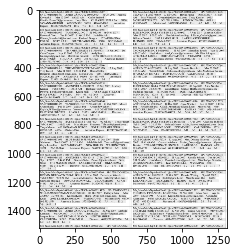

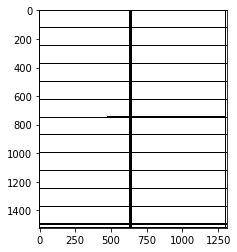

In [0]:
extract_and_save_crops('/content/gdrive/My Drive/Colab Notebooks/ocr_images/input_image_2.jpeg')

In [0]:
!ls "gdrive/My Drive/Colab Notebooks/ocr_images/input_image_2_crops/"

In [0]:
from pytesseract import image_to_string

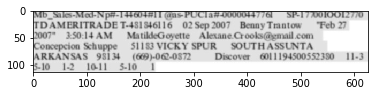

In [13]:
my_pil_crop = cv2.imread('/content/gdrive/My Drive/CEO_Foundry_LLC/Total/100 (1).png')
plt.imshow(my_pil_crop)

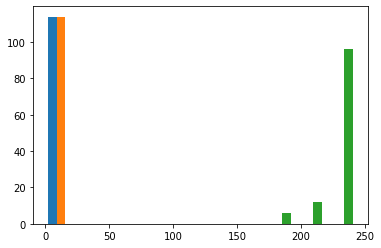

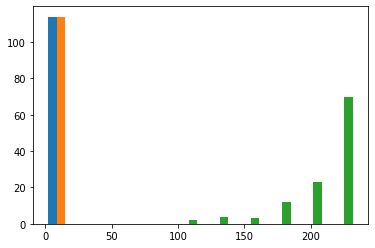

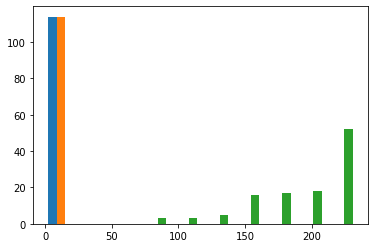

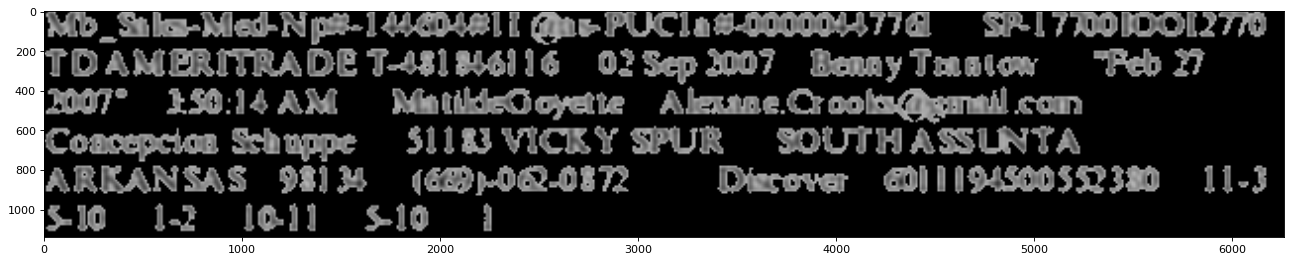

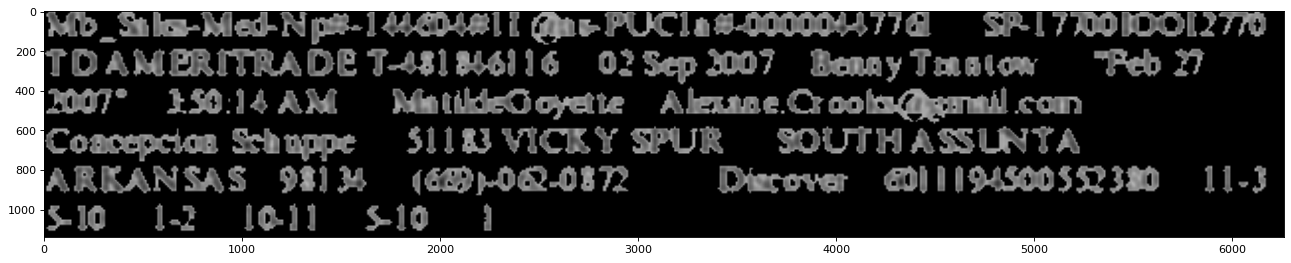

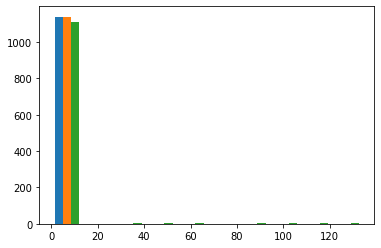

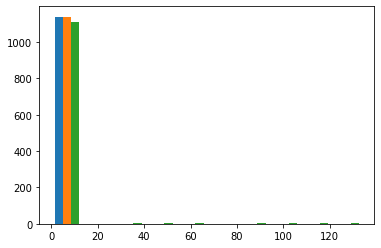

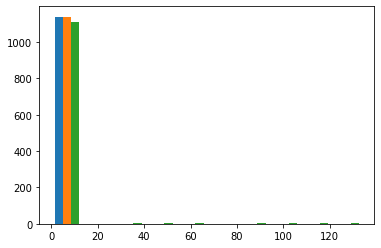

In [0]:
    #my_pil_crop = (cv2.UMat(my_pil_crop))
    #bgr = cv2.cvtColor(my_pil_crop, cv2.COLOR_RGB2BGR)
    hsv = cv2.cvtColor(my_pil_crop, cv2.COLOR_BGR2HSV)
    plt.figure()
    plt.hist(hsv[:,0])
    plt.show()
    plt.figure()
    plt.hist(hsv[:,1])
    plt.show()
    plt.figure()
    plt.hist(hsv[:,2])
    plt.show()
    lower_black = np.array([0,0,0])
    upper_black = np.array([200, 200, 180])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_black, upper_black)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(my_pil_crop,my_pil_crop, mask= mask)
    scale_percent = 1000 # percent of original size
    width = int(res.shape[1] * scale_percent / 100)
    height = int(res.shape[0] * scale_percent / 100)
    dim = (width, height)
    res = cv2.resize(res, dim, cv2.INTER_LINEAR)
    dpi = 80.0
    xpixels, ypixels = 1600, 1600
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    plt.imshow(res)

    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(res,kernel,iterations = 1)
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    plt.imshow(erosion)

    erosion = cv2.cvtColor(erosion, cv2.COLOR_BGR2HSV)
    plt.figure()
    plt.hist(erosion[:,0])
    plt.show()
    plt.figure()
    plt.hist(erosion[:,1])
    plt.show()
    plt.figure()
    plt.hist(erosion[:,2])
    plt.show()

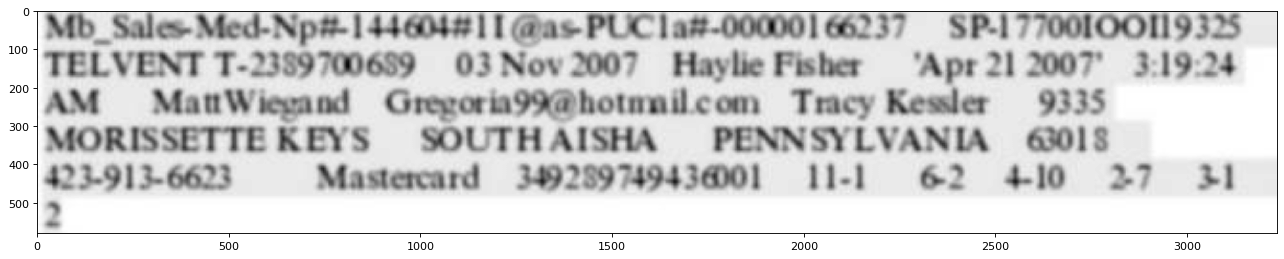

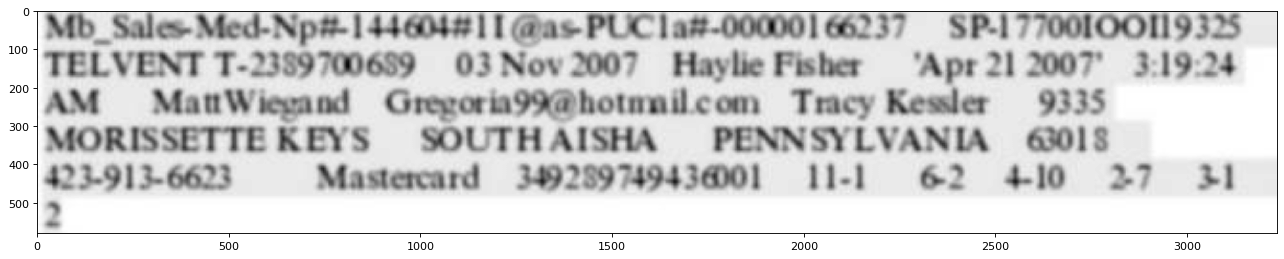

In [42]:
import cv2
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/ocr_images/input_image_1_crops/crop_1.jpg', 0)
#bilinear_img = cv2.resize(img,None, fx = 5, fy = 5, interpolation = cv2.INTER_LINEAR)
#show_cv2_img(bilinear_img)
#bnearest_img = cv2.resize(img,None, fx = 1.2, fy = 1.2, interpolation = cv2.INTER_NEAREST)
#show_cv2_img(bnearest_img)
#barea_img = cv2.resize(img,None, fx = 1.2, fy = 1.2, interpolation = cv2.INTER_AREA)
#show_cv2_img(barea_img)
bcubic_img = cv2.resize(img,None, fx = 5, fy = 5, interpolation = cv2.INTER_CUBIC)
show_cv2_img(bcubic_img)
#blanczos4_img = cv2.resize(img,None, fx = 1.2, fy = 1.2, interpolation = cv2.INTER_LANCZOS4)
#show_cv2_img(blanczos4_img)





#blurred_img = cv2.GaussianBlur(img, (3,3), 0)
#show_cv2_img(blurred_img)
#ret, thresh = cv2.threshold(bilinear_img, 0, 180, cv2.THRESH_OTSU)

#show_cv2_img(thresh)
for row in bilinear_img:
  for pix_intensity in row:
    if pix_intensity < 180:
      pix_intensity = 0
show_cv2_img(bilinear_img)

#for x in range(img.shape[0]):
#    for y in range(img.shape[1]):
#      for z in range(img.shape[2]):
#        if (img[x,y,z]<200).all():
#            img[x,y,z] = 1  

# see modified image (to make sure this is what you need)
#show_cv2_img(img)

#for x in range(blurred_img.shape[0]):
#    for y in range(blurred_img.shape[1]):
#      for z in range(blurred_img.shape[2]):
#        if (blurred_img[x,y,z]<160).all():
#            blurred_img[x,y,z] = 1  

# see modified image (to make sure this is what you need)
#show_cv2_img(blurred_img)

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    hist = np.histogram(clt.labels_, bins=numLabels)

    hist = hist[0].astype("float")
    hist /= hist.sum()

    return hist
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar
def show_hostogram(img):
  #img = cv2.imread('cropped.png',1)#im = Image.open(uploaded)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
  plt.imshow(img)
  clt = KMeans(n_clusters=10) #cluster number
  #print(clt.cluster_centers_)
  print (clt)
  clt.fit(img)

  hist = find_histogram(clt)
  #print (clt.cluster_centers)
  bar = plot_colors2(hist, clt.cluster_centers_)

  plt.axis("off")
  plt.imshow(bar)
  plt.show()

#def plot_color_hist(color_img):

  #color_img = color_img.reshape((color_img.shape[0] * color_img.shape[1],3)) #represent as row*column,channel number
  #plt.imshow(color_img)
  #clt = KMeans(n_clusters=10) #cluster number
  #print(clt.cluster_centers_)
  #print (clt)
  #clt.fit(color_img)

  #hist = find_histogram(clt)
  #print (clt.cluster_centers)
  #bar = plot_colors2(hist, clt.cluster_centers_)

  #plt.axis("off")
  #plt.imshow(bar)
  #plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


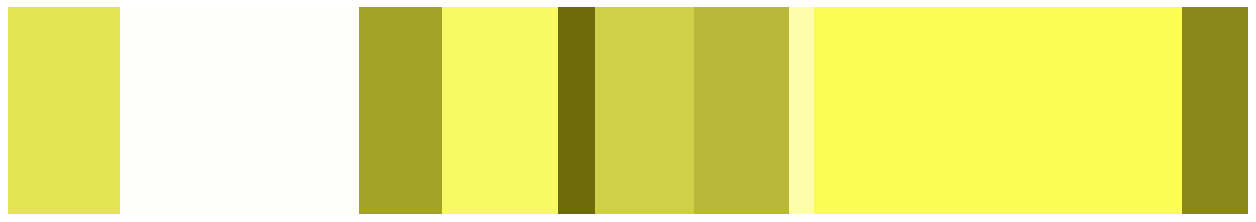

In [67]:
color_img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/ocr_images/input_image_1_crops/crop_1.jpg')
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
color_img = cv2.resize(color_img,None, fx = 5, fy = 5, interpolation = cv2.INTER_CUBIC)
show_cv2_img(color_img)
color_img = color_img.reshape((color_img.shape[0] * color_img.shape[1],3)) #represent as row*column,channel number
plt.imshow(color_img)
clt = KMeans(n_clusters=10) #cluster number
#print(clt.cluster_centers_)
print (clt)
clt.fit(color_img)

hist = find_histogram(clt)
#print (clt.cluster_centers)
bar = plot_colors2(hist, clt.cluster_centers_)

plt.axis("off")
plt.imshow(bar)
plt.show()
#plot_color_hist(bicubic_color_img)

In [68]:
clt.cluster_centers_


array([[229.31500565, 229.88886366,  83.90088029],
       [254.60249639, 254.4339609 , 251.51869932],
       [163.83416298, 162.55204582,  41.88372751],
       [248.45434548, 249.10044861, 100.34075622],
       [109.76999686, 106.82391308,  10.5673029 ],
       [207.44962818, 207.30378071,  72.08225912],
       [185.67988572, 184.94357639,  57.44626941],
       [252.50299725, 254.16462991, 171.59656796],
       [252.62960731, 253.20124557,  83.27252276],
       [138.71547909, 136.77424935,  26.03184746]])

In [72]:
clt.labels_

array([  1, 255,   1, ...,   1,   1,   1], dtype=int32)


bicubic_img


thresh_img



error: ignored

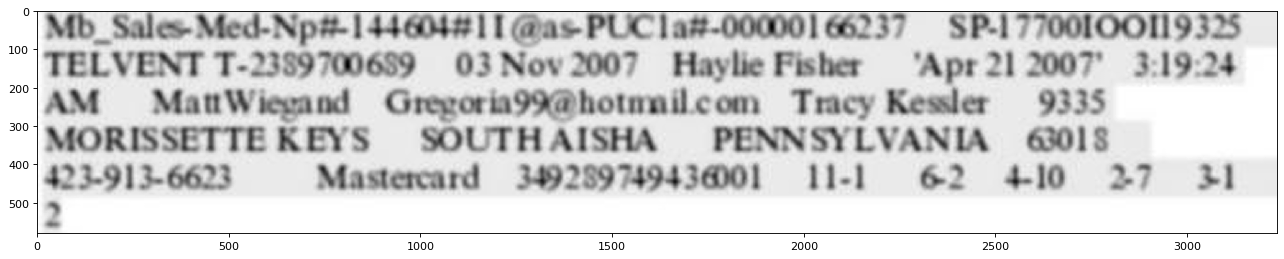

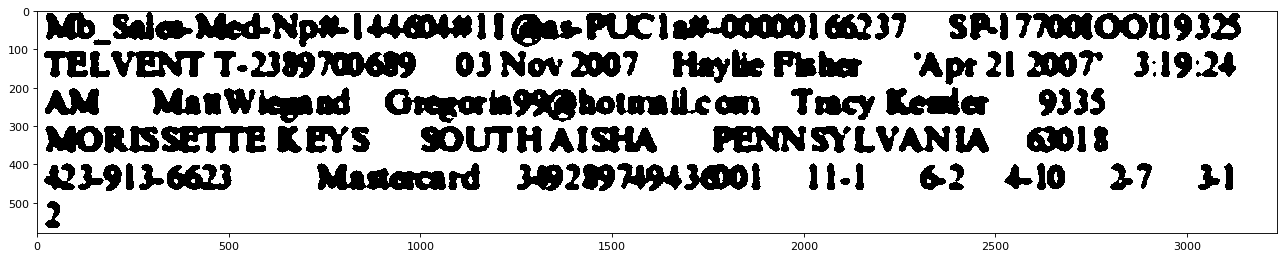

In [50]:
import cv2
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/ocr_images/input_image_1_crops/crop_1.jpg', 0)
bicubic_img = cv2.resize(img,None, fx = 5, fy = 5, interpolation = cv2.INTER_CUBIC)
show_cv2_img(bicubic_img)
print ('\nbicubic_img\n')
image_to_string(bicubic_img)
ret, thresh = cv2.threshold(bicubic_img, 0, 255, cv2.THRESH_OTSU)
show_cv2_img(thresh)
print ('\nthresh_img\n')
image_to_string(thresh)
blurred_img = cv2.medianBlur(thresh, 2)
show_cv2_img(blurred_img)
print ('\nblurred_img\n')
image_to_string(blurred_img)

In [0]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 1)

In [0]:
image_to_string(bicubic_img)

"Mb_Sales- Med-Np#- 144604411 @as- PUC | a#-000001 66237 = SP-1 7700100119325\nTELVENT T-2389700689 03Nov2007 Haylie Fisher ‘Apr 21 2007' 3:19:24\nAM MattWiegand Gregoria99@hotmnilcom Tracy Kesler 9335\nMORISSETTE KEYS SOUTHAISHA PENNSYLVANIA 6015\n423-913-6623 Mastercard 34928974943@01 I1-l1 62 410 27 31\n2"

In [0]:
show_cv2_img(erosion)

In [44]:

image_to_string(bilinear_img)

'Mb_ Sales Med-Np#- 144604411 @as PUC | a#-000001 66237 =SP-1 7700100119325\nTELVENT T-2389700689 03 Nov 2007 Haylie Fisher ‘Apr21 2007 3:19:24\nAM MatWiegand m99@hotmnilcom Tracy Kemler 9335\nMORISSETTE KEYS SOUTHAISHA PENNSYLVANIA G15\n\n423-913-6623 Mastercard 34929974943@01 I1l-l 62 410 27 1\n2'

In [0]:
plt.imsave('/content/gdrive/My Drive/Colab Notebooks/ocr_images/input_image_1_crops/crop_1_enhanced.jpg', bicubic_img, cmap='gray')

In [0]:
plt.imsave('/content/gdrive/My Drive/Colab Notebooks/ocr_images/input_image_1_crops/crop_1_blurred.jpg', blurred_img, cmap='gray')

In [0]:
plt.imsave('/content/gdrive/My Drive/Colab Notebooks/ocr_images/input_image_1_crops/crop_1_final.jpg', thresh, cmap='gray')

In [0]:

color_img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/ocr_images/input_image_1_crops/crop_1.jpg')
denoised_img = cv2.fastNlMeansDenoisingColored(color_img,None,20,10,7,21)

In [0]:
show_cv2_img(denoised_img)

In [0]:
contrast_img = cv2.addWeighted(color_img, 2.5, np.zeros(color_img.shape, color_img.dtype), 0, 0)

In [0]:
contrast_pil_image = cv2.cvtColor(contrast_img, cv2.COLOR_BGR2GRAY)

In [0]:
plt.imshow(contrast_pil_image)

In [0]:
plt.imsave('/content/gdrive/My Drive/Colab Notebooks/ocr_images/input_image_1_crops/crop_1_contrasted.jpg', contrast_pil_image, cmap='gray')